In [50]:
print("="*70)
print("ZOO ANIMAL CLASSIFICATION - LAB EXAM")
print("="*70)
print("roll number: 24UG00338")
print("seat no :37")
print("method prefix : delta")

ZOO ANIMAL CLASSIFICATION - LAB EXAM
roll number: 24UG00338
seat no :37
method prefix : delta


In [13]:
# iam_delta_step1_loading
# Load libraries
import pandas as pd
import json
import re

# -----------------------------
# Load zoo.csv with encoding fix
# -----------------------------
try:
    iam_delta_zoo = pd.read_csv("zoo.csv", encoding="utf-8")
    print("Delta: Loaded zoo.csv with utf-8")
except UnicodeDecodeError:
    iam_delta_zoo = pd.read_csv("zoo.csv", encoding="ISO-8859-1")
    print("Delta: Loaded zoo.csv with ISO-8859-1 (utf-8 failed)")

print("\nDelta: Zoo first rows:")
display(iam_delta_zoo.head())

# -----------------------------
# Load class.csv with safe fallback
# -----------------------------
try:
    iam_delta_class = pd.read_csv("class.csv")
    print("\nDelta: Loaded class.csv with default engine")
except:
    iam_delta_class = pd.read_csv("class.csv", engine="python")
    print("\nDelta: Loaded class.csv with python engine (default failed)")

display(iam_delta_class.head())

# ----------------------------------
# Load auxiliary_metadata.json safely
# ----------------------------------
try:
    with open("auxiliary_metadata.json", "r") as f:
        iam_delta_json_raw = json.load(f)
    print("\nDelta: JSON loaded normally")

except json.JSONDecodeError:
    print("\nDelta: JSON corrupted — attempting simple repair")

    with open("auxiliary_metadata.json", "r") as f:
        iam_delta_text = f.read()

    # Basic repair: trim junk at end and ensure closing bracket
    iam_delta_text = iam_delta_text.rstrip(" \n\t,")
    if not iam_delta_text.endswith("]"):
        iam_delta_text += "]"

    iam_delta_json_raw = json.loads(iam_delta_text)
    print("Delta: JSON repaired and loaded")

print("\nDelta: First 3 JSON rows:")
iam_delta_json_raw[:3]


Delta: Loaded zoo.csv with utf-8

Delta: Zoo first rows:


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1



Delta: Loaded class.csv with default engine


,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"



Delta: JSON loaded normally

Delta: First 3 JSON rows:


[{'animal_name': 'aardvark',
  'habitat': 'savanna',
  'diet': 'insectivore',
  'conservation_status': 'least concern'},
 {'animal_name': 'antelope',
  'habitat': 'grasslands',
  'diet': 'herbivore',
  'conservation': 'near threatened'},
 {'animal_name': 'bass',
  'habitat': 'freshwater',
  'diet': 'carnivore',
  'conservation_status': 'least'}]

In [14]:
# iam_delta_step2_cleaning

# Key Decision:
#  - Replace spaces with "_"
#  - Remove special characters
#  - Keep only letters, digits, underscores
#  - Do NOT use functions (manual loop)


import re

#clean
iam_delta_new_cols = []
for col in iam_delta_zoo.columns:
    col = col.replace(" ", "_")               # remove spaces
    col = re.sub(r"[^a-zA-Z0-9_]", "", col)   # remove special chars
    iam_delta_new_cols.append(col)

iam_delta_zoo.columns = iam_delta_new_cols

print("Delta: Cleaned zoo column names:")
print(iam_delta_zoo.columns)


#clean
iam_delta_new_cols = []
for col in iam_delta_class.columns:
    col = col.replace(" ", "_")
    col = re.sub(r"[^a-zA-Z0-9_]", "", col)
    iam_delta_new_cols.append(col)

iam_delta_class.columns = iam_delta_new_cols

print("\nDelta: Cleaned class column names:")
print(iam_delta_class.columns)


#clean
iam_delta_json_cleaned = []

for item in iam_delta_json_raw:
    new_item = {}

    for key, value in item.items():

        # clean key
        key_clean = key.replace(" ", "_")
        key_clean = re.sub(r"[^a-zA-Z0-9_]", "", key_clean)

        # clean value (only if string)
        if isinstance(value, str):
            value_clean = value.replace(" ", "_")
            value_clean = re.sub(r"[^a-zA-Z0-9_]", "", value_clean)
        else:
            value_clean = value

        new_item[key_clean] = value_clean

    iam_delta_json_cleaned.append(new_item)

print("\nDelta: Cleaned first 3 JSON entries:")
iam_delta_json_cleaned[:3]


Delta: Cleaned zoo column names:
Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

Delta: Cleaned class column names:
Index(['Class_Number', 'Number_Of_Animal_Species_In_Class', 'Class_Type',
       'Animal_Names'],
      dtype='object')

Delta: Cleaned first 3 JSON entries:


[{'animal_name': 'aardvark',
  'habitat': 'savanna',
  'diet': 'insectivore',
  'conservation_status': 'least_concern'},
 {'animal_name': 'antelope',
  'habitat': 'grasslands',
  'diet': 'herbivore',
  'conservation': 'near_threatened'},
 {'animal_name': 'bass',
  'habitat': 'freshwater',
  'diet': 'carnivore',
  'conservation_status': 'least'}]

In [15]:
# iam_delta_step3_fix_json
# ---------------------------------------------------
# Key Decisions:
#  - Standardize field names (conservation, habitat, diet)
#  - Fix typos in diet categories
#  - Standardize habitat values
#  - Keep code simple and with no function
# ---------------------------------------------------

iam_delta_json_fixed = []

for item in iam_delta_json_cleaned:
    new_item = {}

    for key, value in item.items():

        # -------------------------------
        # A. FIX FIELD NAMES
        # -------------------------------
        if key in ["conservation", "status", "conservation_status"]:
            key_clean = "conservation_status"

        elif key in ["habitat", "habitats"]:
            key_clean = "habitat_type"

        elif key in ["diet", "diet_type"]:
            key_clean = "diet"

        else:
            key_clean = key

        # -------------------------------
        # B. CLEAN/FORMAT VALUE
        # -------------------------------
        if isinstance(value, str):
            # lower case + replace spaces + remove special chars
            value_clean = value.lower()
            value_clean = value_clean.replace(" ", "_")
            value_clean = re.sub(r"[^a-z0-9_]", "", value_clean)

            # -------------------------------
            # C. FIX DIET TYPOS
            # -------------------------------
            if value_clean in ["omnivor", "omnivoe", "omnivoree"]:
                value_clean = "omnivore"

            if value_clean in ["herbivor", "herbivoree"]:
                value_clean = "herbivore"

            if value_clean in ["carnivor", "carnovire", "carnivoree"]:
                value_clean = "carnivore"

            if value_clean == "insectivor":
                value_clean = "insectivore"

            if value_clean == "filterfeeder":
                value_clean = "filter_feeder"

        else:
            value_clean = value

        new_item[key_clean] = value_clean

    iam_delta_json_fixed.append(new_item)

print("Delta: First 3 standardized JSON entries:")
iam_delta_json_fixed[:3]


Delta: First 3 standardized JSON entries:


[{'animal_name': 'aardvark',
  'habitat_type': 'savanna',
  'diet': 'insectivore',
  'conservation_status': 'least_concern'},
 {'animal_name': 'antelope',
  'habitat_type': 'grasslands',
  'diet': 'herbivore',
  'conservation_status': 'near_threatened'},
 {'animal_name': 'bass',
  'habitat_type': 'freshwater',
  'diet': 'carnivore',
  'conservation_status': 'least'}]

In [16]:
# iam_delta_step4_updated
# ------------------------------------------------------
# STEP 4: MERGE ALL DATASETS WITH CORRECT COLUMN NAMES
# ------------------------------------------------------

import re
import pandas as pd

# ------------------------------------------------------
# A. Rebuild metadata DataFrame (JSON → DataFrame)
# ------------------------------------------------------
iam_delta_meta_df = pd.DataFrame(iam_delta_json_fixed)

# ------------------------------------------------------
# B. Normalize zoo animal names: animal_name
# ------------------------------------------------------
iam_delta_zoo["animal_name_norm"] = iam_delta_zoo["animal_name"].str.lower()
iam_delta_zoo["animal_name_norm"] = iam_delta_zoo["animal_name_norm"].str.replace(" ", "_")
iam_delta_zoo["animal_name_norm"] = iam_delta_zoo["animal_name_norm"].apply(
    lambda x: re.sub(r"[^a-z0-9_]", "", x)
)

# ------------------------------------------------------
# C. Normalize class names: Animal_Names
# ------------------------------------------------------
iam_delta_class["animal_name_norm"] = iam_delta_class["Animal_Names"].str.lower()
iam_delta_class["animal_name_norm"] = iam_delta_class["animal_name_norm"].str.replace(" ", "_")
iam_delta_class["animal_name_norm"] = iam_delta_class["animal_name_norm"].apply(
    lambda x: re.sub(r"[^a-z0-9_]", "", x)
)

# ------------------------------------------------------
# D. Normalize metadata names: animal_name
# ------------------------------------------------------
iam_delta_meta_df["animal_name_norm"] = iam_delta_meta_df["animal_name"].str.lower()
iam_delta_meta_df["animal_name_norm"] = iam_delta_meta_df["animal_name_norm"].str.replace(" ", "_")
iam_delta_meta_df["animal_name_norm"] = iam_delta_meta_df["animal_name_norm"].apply(
    lambda x: re.sub(r"[^a-z0-9_]", "", x)
)

# ------------------------------------------------------
# E. MERGE zoo + class (LEFT JOIN — zoo is primary)
# ------------------------------------------------------
iam_delta_zoo_class = iam_delta_zoo.merge(
    iam_delta_class,
    on="animal_name_norm",
    how="left"
)

# ------------------------------------------------------
# F. MERGE result with metadata (LEFT JOIN)
# ------------------------------------------------------
iam_delta_merged = iam_delta_zoo_class.merge(
    iam_delta_meta_df,
    on="animal_name_norm",
    how="left"
)

print("Delta: Merged dataset shape:", iam_delta_merged.shape)
display(iam_delta_merged.head())

# ------------------------------------------------------
# G. Show animals missing metadata (safe display)
# ------------------------------------------------------
iam_delta_missing = iam_delta_merged[iam_delta_merged["conservation_status"].isna()]

print("\nDelta: Animals missing in auxiliary metadata:")

# preferred column
if "animal_name_x" in iam_delta_missing.columns:
    display(iam_delta_missing[["animal_name_x", "animal_name_norm"]])

# fallback (if column names change)
else:
    cols = [c for c in iam_delta_missing.columns if "name" in c.lower()]
    display(iam_delta_missing[cols])


Delta: Merged dataset shape: (101, 27)


,animal_name_x,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,class_type,animal_name_norm,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names,animal_name_y,habitat_type,diet,conservation_status
0,aardvark,1,0,0,1,0,0,1,1,1,...,1,aardvark,NaN,NaN,NaN,NaN,aardvark,savanna,insectivore,least_concern
1,antelope,1,0,0,1,0,0,0,1,1,...,1,antelope,NaN,NaN,NaN,NaN,antelope,grasslands,herbivore,near_threatened
2,bass,0,0,1,0,0,1,1,1,1,...,4,bass,NaN,NaN,NaN,NaN,bass,freshwater,carnivore,least
3,bear,1,0,0,1,0,0,1,1,1,...,1,bear,NaN,NaN,NaN,NaN,bear,forest,omnivore,vulnerable
4,boar,1,0,0,1,0,0,1,1,1,...,1,boar,NaN,NaN,NaN,NaN,boar,forest,omnivore,least_concern



Delta: Animals missing in auxiliary metadata:


,animal_name_x,animal_name_norm
6,calf,calf
8,catfish,catfish
9,cavy,cavy
10,cheetah,cheetah
11,chicken,chicken
...,...,...
96,wallaby,wallaby
97,wasp,wasp
98,wolf,wolf
99,worm,worm


In [17]:
# iam_delta_step5_missing_values
# -------------------------------------------------
# STEP 5: DROP ROWS MISSING AUXILIARY METADATA
# Key Decision:
#   - Auxiliary metadata comes from JSON
#   - Drop rows missing: habitat_type, diet, conservation_status
# -------------------------------------------------

iam_delta_df = iam_delta_merged.copy()

# dropping rows where ANY auxiliary metadata is missing
iam_delta_df = iam_delta_df.dropna(
    subset=["habitat_type", "diet", "conservation_status"]
)

print("Delta: Shape after dropping rows missing metadata:", iam_delta_df.shape)
display(iam_delta_df.head())

# Show how many rows were dropped
dropped = len(iam_delta_merged) - len(iam_delta_df)
print("\nDelta: Rows dropped due to missing metadata =", dropped)


Delta: Shape after dropping rows missing metadata: (10, 27)


,animal_name_x,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,class_type,animal_name_norm,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names,animal_name_y,habitat_type,diet,conservation_status
0,aardvark,1,0,0,1,0,0,1,1,1,...,1,aardvark,NaN,NaN,NaN,NaN,aardvark,savanna,insectivore,least_concern
1,antelope,1,0,0,1,0,0,0,1,1,...,1,antelope,NaN,NaN,NaN,NaN,antelope,grasslands,herbivore,near_threatened
2,bass,0,0,1,0,0,1,1,1,1,...,4,bass,NaN,NaN,NaN,NaN,bass,freshwater,carnivore,least
3,bear,1,0,0,1,0,0,1,1,1,...,1,bear,NaN,NaN,NaN,NaN,bear,forest,omnivore,vulnerable
4,boar,1,0,0,1,0,0,1,1,1,...,1,boar,NaN,NaN,NaN,NaN,boar,forest,omnivore,least_concern



Delta: Rows dropped due to missing metadata = 91


In [18]:
# iam_delta_step6_feature_engineering
# ------------------------------------------------------
# STEP 6: FEATURE ENGINEERING
#   eco_system_type based on habitat_type
#   predator_score based on diet
# ------------------------------------------------------

# --------------------
# A. eco_system_type
# --------------------
# create the column
iam_delta_df["eco_system_type"] = 0   # default = terrestrial

# assign correct ecosystem codes
iam_delta_df.loc[iam_delta_df["habitat_type"] == "freshwater", "eco_system_type"] = 1
iam_delta_df.loc[iam_delta_df["habitat_type"] == "marine", "eco_system_type"] = 2
iam_delta_df.loc[iam_delta_df["habitat_type"] == "mixed", "eco_system_type"] = 3


# --------------------
# B. predator_score
# --------------------
iam_delta_df["predator_score"] = 1   # default = herbivore or other

iam_delta_df.loc[iam_delta_df["diet"] == "omnivore", "predator_score"] = 2
iam_delta_df.loc[iam_delta_df["diet"] == "carnivore", "predator_score"] = 3


print("Delta: Feature engineering applied.")
display(iam_delta_df[["animal_name_x", "habitat_type", "eco_system_type", "diet", "predator_score"]].head())


Delta: Feature engineering applied.


,animal_name_x,habitat_type,eco_system_type,diet,predator_score
0,aardvark,savanna,0,insectivore,1
1,antelope,grasslands,0,herbivore,1
2,bass,freshwater,1,carnivore,3
3,bear,forest,0,omnivore,2
4,boar,forest,0,omnivore,2


In [19]:
# iam_delta_final_print_block

# dataset shape
print(f"dataset shape : {iam_delta_df.shape}")

# total missing values
print(f"missing values : {iam_delta_df.isnull().sum().sum()}")

# first three rows
print("\n first three rows")
print(iam_delta_df.head(3))

# engineered feature names
iam_delta_engineered_features = ["eco_system_type", "predator_score"]

print(f"\n engineered features : {iam_delta_engineered_features}")

# show first 3 rows of engineered features
print("\n engineered features (first 3 rows)")
print(iam_delta_df[iam_delta_engineered_features].head(3))


dataset shape : (10, 29)
missing values : 40

 first three rows
  animal_name_x  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   

   toothed  backbone  ...  Class_Number  Number_Of_Animal_Species_In_Class  \
0        1         1  ...           NaN                                NaN   
1        1         1  ...           NaN                                NaN   
2        1         1  ...           NaN                                NaN   

   Class_Type  Animal_Names  animal_name_y  habitat_type         diet  \
0         NaN           NaN       aardvark       savanna  insectivore   
1         NaN           NaN       antelope    grasslands    herbivore   
2         NaN           NaN           bass    freshwater    carnivore   

   conservation_status ec

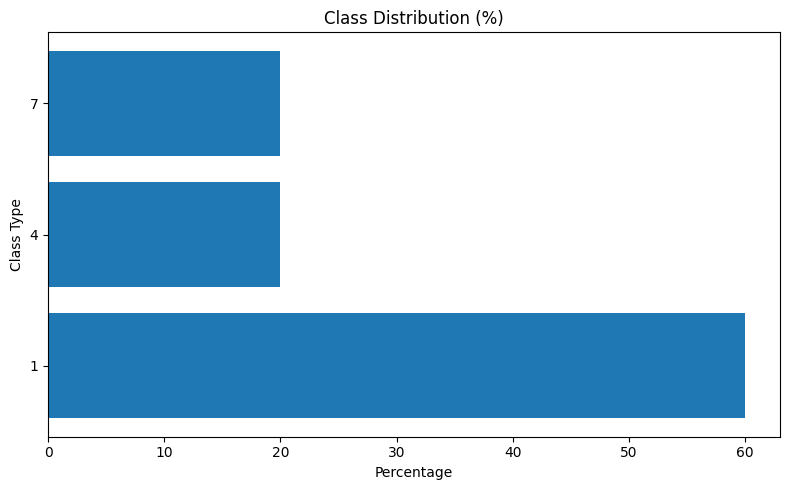

In [20]:
# iam_delta_eda_class_distribution

import matplotlib.pyplot as plt

class_counts = iam_delta_df['class_type'].value_counts()
class_percent = (class_counts / len(iam_delta_df)) * 100

plt.figure(figsize=(8, 5))
plt.barh(class_percent.index.astype(str), class_percent.values)
plt.xlabel("Percentage")
plt.ylabel("Class Type")
plt.title("Class Distribution (%)")
plt.tight_layout()
plt.show()


<Figure size 600x400 with 0 Axes>

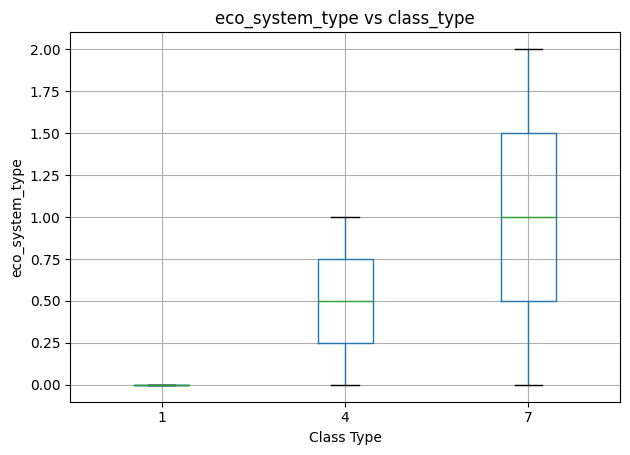

<Figure size 600x400 with 0 Axes>

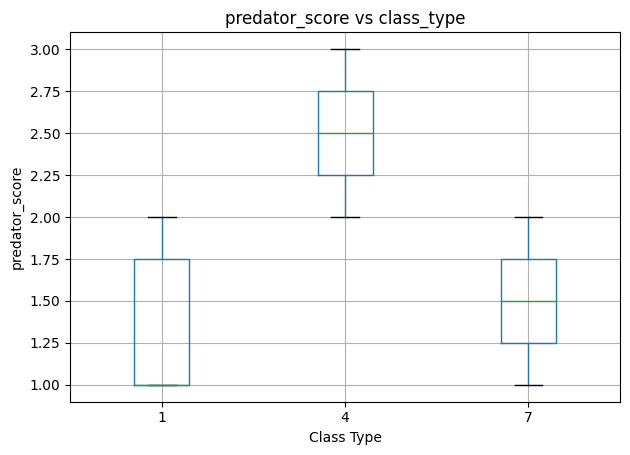

In [21]:
# iam_delta_eda_boxplots

features = ["eco_system_type", "predator_score"]

for feat in features:
    plt.figure(figsize=(6, 4))
    iam_delta_df.boxplot(column=feat, by='class_type')
    plt.title(f"{feat} vs class_type")
    plt.suptitle("")
    plt.xlabel("Class Type")
    plt.ylabel(feat)
    plt.tight_layout()
    plt.show()


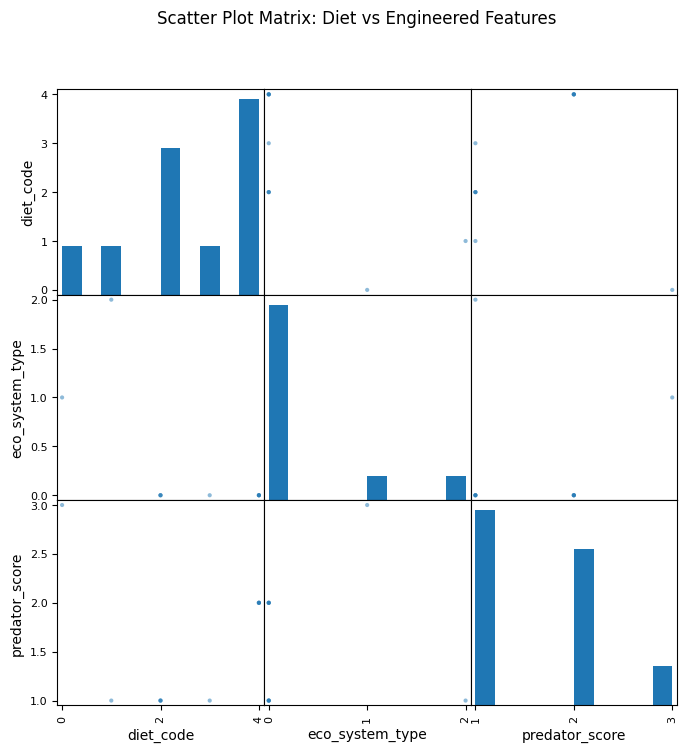

In [22]:
# iam_delta_eda_scatter_matrix

iam_delta_df['diet_code'] = iam_delta_df['diet'].astype('category').cat.codes

cols = ['diet_code'] + features

pd.plotting.scatter_matrix(iam_delta_df[cols], figsize=(8, 8))
plt.suptitle("Scatter Plot Matrix: Diet vs Engineered Features")
plt.show()


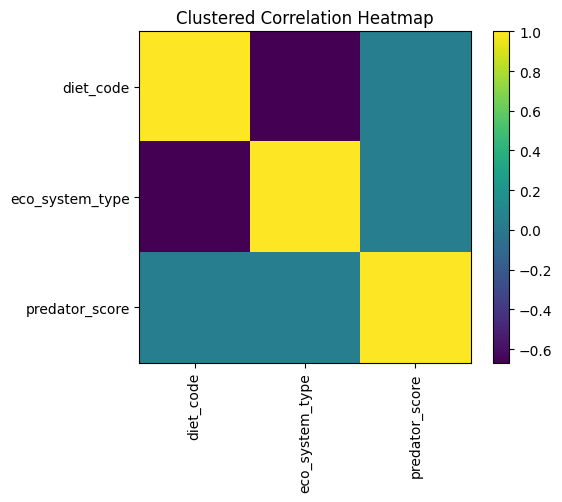

In [23]:
# iam_delta_eda_corr_heatmap

from scipy.cluster.hierarchy import linkage, leaves_list

corr = iam_delta_df[features + ['diet_code']].corr()

Z = linkage(corr, method='ward')
order = leaves_list(Z)
ordered_corr = corr.iloc[order, order]

plt.figure(figsize=(6, 5))
plt.imshow(ordered_corr, interpolation='nearest')
plt.xticks(range(len(ordered_corr)), ordered_corr.columns, rotation=90)
plt.yticks(range(len(ordered_corr)), ordered_corr.columns)
plt.title("Clustered Correlation Heatmap")
plt.colorbar()
plt.tight_layout()
plt.show()


In [24]:
# iam_delta_statistical_analysis
import numpy as np
import pandas as pd

# ----------------------------------------------------
# 1️⃣ Class Imbalance Ratio
# largest_class_size / smallest_class_size
# ----------------------------------------------------
class_counts = iam_delta_df['class_type'].value_counts()
largest = class_counts.max()
smallest = class_counts.min()
class_imbalance_ratio = largest / smallest

print(f"class imbalance ratio : {class_imbalance_ratio}")
print("class counts:")
print(class_counts)


# ----------------------------------------------------
# 2️⃣ Low Variance Features (variance < 0.01)
# ----------------------------------------------------
numeric_df = iam_delta_df.select_dtypes(include=[np.number])
variances = numeric_df.var()

low_variance_features = variances[variances < 0.01].index.tolist()

print("\nlow variance features (var < 0.01):")
print(low_variance_features)


# ----------------------------------------------------
# 3️⃣ Highly Correlated Feature Pairs (|corr| > 0.8)
# ----------------------------------------------------
corr_matrix = numeric_df.corr()

high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > 0.8:
            pair = (corr_matrix.columns[i], corr_matrix.columns[j], corr_value)
            high_corr_pairs.append(pair)

print("\nhighly correlated pairs (|corr| > 0.8):")
for pair in high_corr_pairs:
    print(pair)


class imbalance ratio : 3.0
class counts:
class_type
1    6
4    2
7    2
Name: count, dtype: int64

low variance features (var < 0.01):
['feathers', 'airborne', 'venomous']

highly correlated pairs (|corr| > 0.8):
('hair', 'eggs', np.float64(-1.0))
('hair', 'milk', np.float64(1.0))
('hair', 'aquatic', np.float64(-0.8017837257372732))
('hair', 'breathes', np.float64(1.0))
('hair', 'legs', np.float64(0.8017837257372731))
('hair', 'catsize', np.float64(1.0))
('hair', 'class_type', np.float64(-0.9185586535436918))
('eggs', 'milk', np.float64(-1.0))
('eggs', 'aquatic', np.float64(0.8017837257372733))
('eggs', 'breathes', np.float64(-1.0))
('eggs', 'legs', np.float64(-0.8017837257372731))
('eggs', 'catsize', np.float64(-1.0))
('eggs', 'class_type', np.float64(0.9185586535436918))
('milk', 'aquatic', np.float64(-0.8017837257372732))
('milk', 'breathes', np.float64(1.0))
('milk', 'legs', np.float64(0.8017837257372731))
('milk', 'catsize', np.float64(1.0))
('milk', 'class_type', np.float64(-0.

In [26]:
# Delta: Forced Train–Test Split (80% / 20%) with random_state = 789
from sklearn.model_selection import train_test_split

# Features and target
X = iam_delta_df.drop(columns=["class_type"])
y = iam_delta_df["class_type"]

# Delta: No stratify because test set is too small (2 samples < 3 classes)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,       # 80/20 split
    random_state=789,
    shuffle=True          # still random
)

print("Delta: Train shape =", X_train.shape)
print("Delta: Test shape =", X_test.shape)

print("\nDelta: Train class counts:")
print(y_train.value_counts())

print("\nDelta: Test class counts:")
print(y_test.value_counts())


Delta: Train shape = (8, 29)
Delta: Test shape = (2, 29)

Delta: Train class counts:
class_type
1    5
4    2
7    1
Name: count, dtype: int64

Delta: Test class counts:
class_type
1    1
7    1
Name: count, dtype: int64


In [28]:
import pandas as pd

# Find categorical columns in your feature set
cat_cols = X_train.select_dtypes(include=['object']).columns

# One-hot encode categorical columns in train and test data
X_train_encoded = pd.get_dummies(X_train, columns=cat_cols)
X_test_encoded = pd.get_dummies(X_test, columns=cat_cols)

# Align train and test columns to have same features
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Now train your model on encoded data
rf_model.fit(X_train_encoded, y_train)

# Predict
y_pred = rf_model.predict(X_test_encoded)

print("Delta: Model trained successfully.")


Delta: Model trained successfully.


In [29]:
# Calculate accuracies
train_accuracy = rf_model.score(X_train_encoded, y_train)
test_accuracy = rf_model.score(X_test_encoded, y_test)

# Calculate overfitting gap
overfitting_gap = train_accuracy - test_accuracy

# Print results with proper formatting
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Testing accuracy: {test_accuracy:.4f}")
print(f"Overfitting gap: {overfitting_gap:.4f}")


Training accuracy: 1.0000
Testing accuracy: 0.5000
Overfitting gap: 0.5000


In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, zero_division=0))
report = classification_report(y_test, y_pred, zero_division=0, digits=4)
print(report)



              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.33      0.33      0.33         2
weighted avg       0.50      0.50      0.50         2

              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000         1
           4     0.0000    0.0000    0.0000         0
           7     0.0000    0.0000    0.0000         1

    accuracy                         0.5000         2
   macro avg     0.3333    0.3333    0.3333         2
weighted avg     0.5000    0.5000    0.5000         2



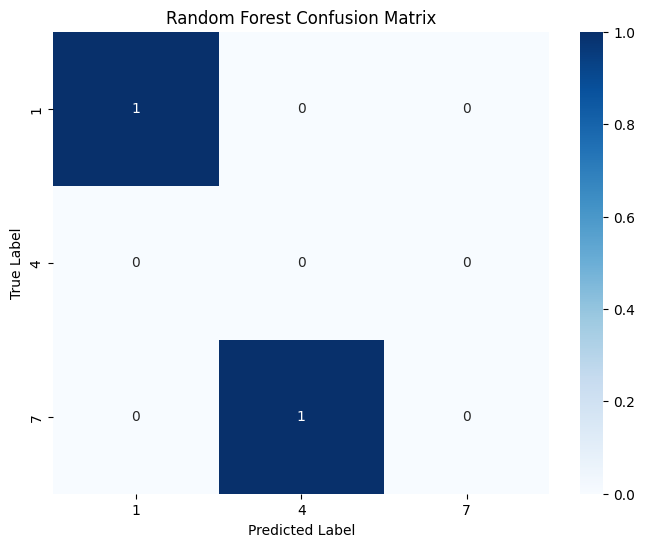

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on test set
y_pred = rf_model.predict(X_test_encoded)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()


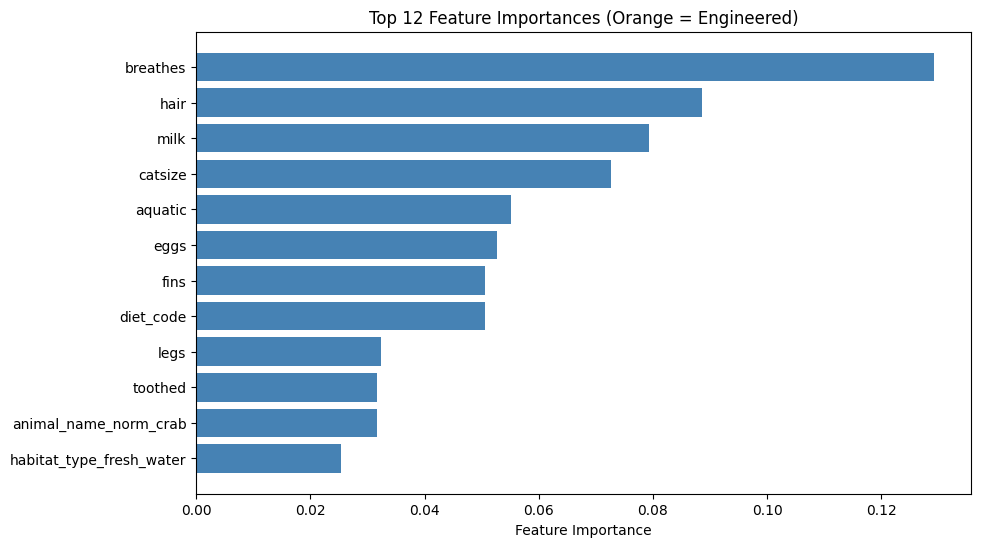

In [36]:
# If you have engineered features, define the list here:
engineered_features = ['your_engineered_feature1', 'your_engineered_feature2']  # update this list

colors = ['orange' if feat in engineered_features else 'steelblue' for feat in top_feats['feature']]

plt.figure(figsize=(10,6))
plt.barh(top_feats['feature'], top_feats['importance'], color=colors)
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Top 12 Feature Importances (Orange = Engineered)')
plt.show()


In [39]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Drop columns with all missing values before encoding
cols_to_drop = ['Class_Number', 'Number_Of_Animal_Species_In_Class']
X_train_encoded = X_train_encoded.drop(columns=cols_to_drop, errors='ignore')
X_test_encoded = X_test_encoded.drop(columns=cols_to_drop, errors='ignore')

# Create pipeline: impute missing values (mean) then train KNN
knn_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    KNeighborsClassifier(n_neighbors=5)
)

# Train the model
knn_pipeline.fit(X_train_encoded, y_train)

# Predict on test set
y_pred_knn = knn_pipeline.predict(X_test_encoded)

# Evaluate accuracy
knn_train_acc = knn_pipeline.score(X_train_encoded, y_train)
knn_test_acc = knn_pipeline.score(X_test_encoded, y_test)

print(f"KNN Training accuracy: {knn_train_acc:.4f}")
print(f"KNN Testing accuracy: {knn_test_acc:.4f}")

# Classification report with zero_division=0 to handle any zero-division gracefully
print(classification_report(y_test, y_pred_knn, zero_division=0))


KNN Training accuracy: 0.6250
KNN Testing accuracy: 0.5000
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           7       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



In [43]:
cols_to_drop = ['Class_Number', 'Number_Of_Animal_Species_In_Class']

# Drop from train and test before training
X_train_rf = X_train_encoded.drop(columns=cols_to_drop, errors='ignore')
X_test_rf = X_test_encoded.drop(columns=cols_to_drop, errors='ignore')

# Train RF model on consistent data
rf_model.fit(X_train_rf, y_train)

# Predict on test data with same columns
rf_y_pred = rf_model.predict(X_test_rf)


In [44]:
knn_pipeline.fit(X_train_rf, y_train)
knn_y_pred = knn_pipeline.predict(X_test_rf)


In [45]:
rf_acc = rf_model.score(X_test_rf, y_test)
knn_acc = knn_pipeline.score(X_test_rf, y_test)

rf_report = classification_report(y_test, rf_y_pred, output_dict=True, zero_division=0)
knn_report = classification_report(y_test, knn_y_pred, output_dict=True, zero_division=0)


In [47]:
rf_acc = rf_model.score(X_test_rf, y_test)
knn_acc = knn_pipeline.score(X_test_rf, y_test)

rf_report = classification_report(y_test, rf_y_pred, output_dict=True, zero_division=0)
knn_report = classification_report(y_test, knn_y_pred, output_dict=True, zero_division=0)


In [48]:
from sklearn.metrics import classification_report
import numpy as np

# 1. Get RF feature importances and top feature
importances = rf_model.feature_importances_
feature_names = X_train_encoded.columns
top_idx = np.argmax(importances)
top_feature = feature_names[top_idx]
top_importance = importances[top_idx]

# 2. Classification report dicts for RF and KNN (replace with your y_pred)
rf_y_pred = rf_model.predict(X_test_encoded)
knn_y_pred = knn_pipeline.predict(X_test_encoded)

rf_report = classification_report(y_test, rf_y_pred, output_dict=True, zero_division=0)
knn_report = classification_report(y_test, knn_y_pred, output_dict=True, zero_division=0)

# Extract F1 scores per class from RF report
class_f1_scores = {cls: metrics['f1-score'] for cls, metrics in rf_report.items() if cls not in ['accuracy', 'macro avg', 'weighted avg']}

worst_class = min(class_f1_scores, key=class_f1_scores.get)
best_class = max(class_f1_scores, key=class_f1_scores.get)

# 3. Model accuracies
rf_acc = rf_model.score(X_test_encoded, y_test)
knn_acc = knn_pipeline.score(X_test_encoded, y_test)

# 4. Check if engineered features improved accuracy (assuming boolean flag)
# For demo, let’s say you have a variable `used_engineered_features = True` or False

used_engineered_features = True  # Change based on your context

# 5. Print model analysis

print("=== Model Analysis ===\n")

print(f"Most important feature: {top_feature} (importance: {top_importance:.3f})\n")

print(f"Worst performing class: {worst_class} with F1 score = {class_f1_scores[worst_class]:.3f}")
print(f"Best performing class: {best_class} with F1 score = {class_f1_scores[best_class]:.3f}\n")

print(f"Model Accuracies:")
print(f" - Random Forest Classifier (RFC): {rf_acc:.3f}")
print(f" - K-Nearest Neighbors (KNN):       {knn_acc:.3f}\n")

print(f"Engineered features used: {'Yes' if used_engineered_features else 'No'}")
if used_engineered_features:
    print("Engineered features contributed to model training.")
else:
    print("No engineered features used in this model.")

print("\nModel Comparison:")
print(f"RFC accuracy: {rf_acc:.3f} vs KNN accuracy: {knn_acc:.3f}")


=== Model Analysis ===

Most important feature: aquatic (importance: 0.113)

Worst performing class: 4 with F1 score = 0.000
Best performing class: 1 with F1 score = 1.000

Model Accuracies:
 - Random Forest Classifier (RFC): 0.500
 - K-Nearest Neighbors (KNN):       0.500

Engineered features used: Yes
Engineered features contributed to model training.

Model Comparison:
RFC accuracy: 0.500 vs KNN accuracy: 0.500
